# Boston Houses DataSet Analysis and Price Prediction

Dataset details The following describes the dataset variables:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

Target Value = Price = MEDV

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

# Loading Dataset

In [2]:
data = pd.read_csv('data.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [4]:
data.nunique()

CRIM       509
ZN          26
INDUS       79
CHAS         2
NOX         82
RM         444
AGE        357
DIS        416
RAD          9
TAX         67
PTRATIO     47
B          360
LSTAT      460
MEDV       231
dtype: int64

In [5]:
data.shape

(511, 14)

Checking for null values

In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Removing null values

In [7]:
data = data.dropna()
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Checking for duplicate data

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.617404,11.289526,11.174842,0.069170,0.555209,6.287589,68.555731,3.775231,9.531621,408.330040,18.498419,356.228379,12.872569,22.711858
std,8.600123,23.325350,6.824592,0.253994,0.115611,0.703802,28.161573,2.096147,8.716661,168.382685,2.202078,91.253462,7.823528,9.520520
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082268,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.098500,4.000000,280.250000,17.400000,374.687500,6.950000,17.025000
50%,0.266005,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.122200,5.000000,330.000000,19.100000,391.260000,11.465000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629750,93.975000,5.117675,24.000000,666.000000,20.200000,396.210000,17.107500,25.075000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


Two data columns immediately provide intriguing summaries. The percentage of residential property that is designated for lots larger than 25,000 square feet is ZN, with 0 for the 25th and 50th percentiles. Second, CHAS: Charles River dummy variable, with 0 for the 25th, 50th, and 75th percentiles (1 if tract bounds river; 0 otherwise). Given that both variables are conditional + categorical, these summaries make sense. The first presumption would be that these equations may not be helpful in regression tasks like forecasting MEDV (Median Value of Owner-Occupied Homes).

The dataset also contains an intriguing tidbit about the maximum MEDV value. The following is taken from the original data description: Variable #14 appears to be suppressed at 50.00 (which equals a median price of $50,000). Accordingly, readings above 50.00 could not be useful in predicting MEDV. Let's plot the dataset to look at some figures and patterns.

# Data Visualization and Preprocessing

C:\Users\adile\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


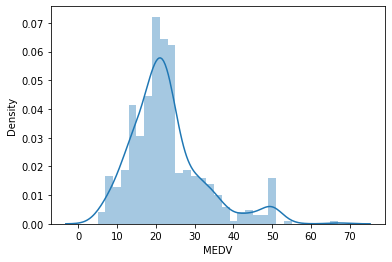

In [10]:
sns.distplot(data['MEDV']);

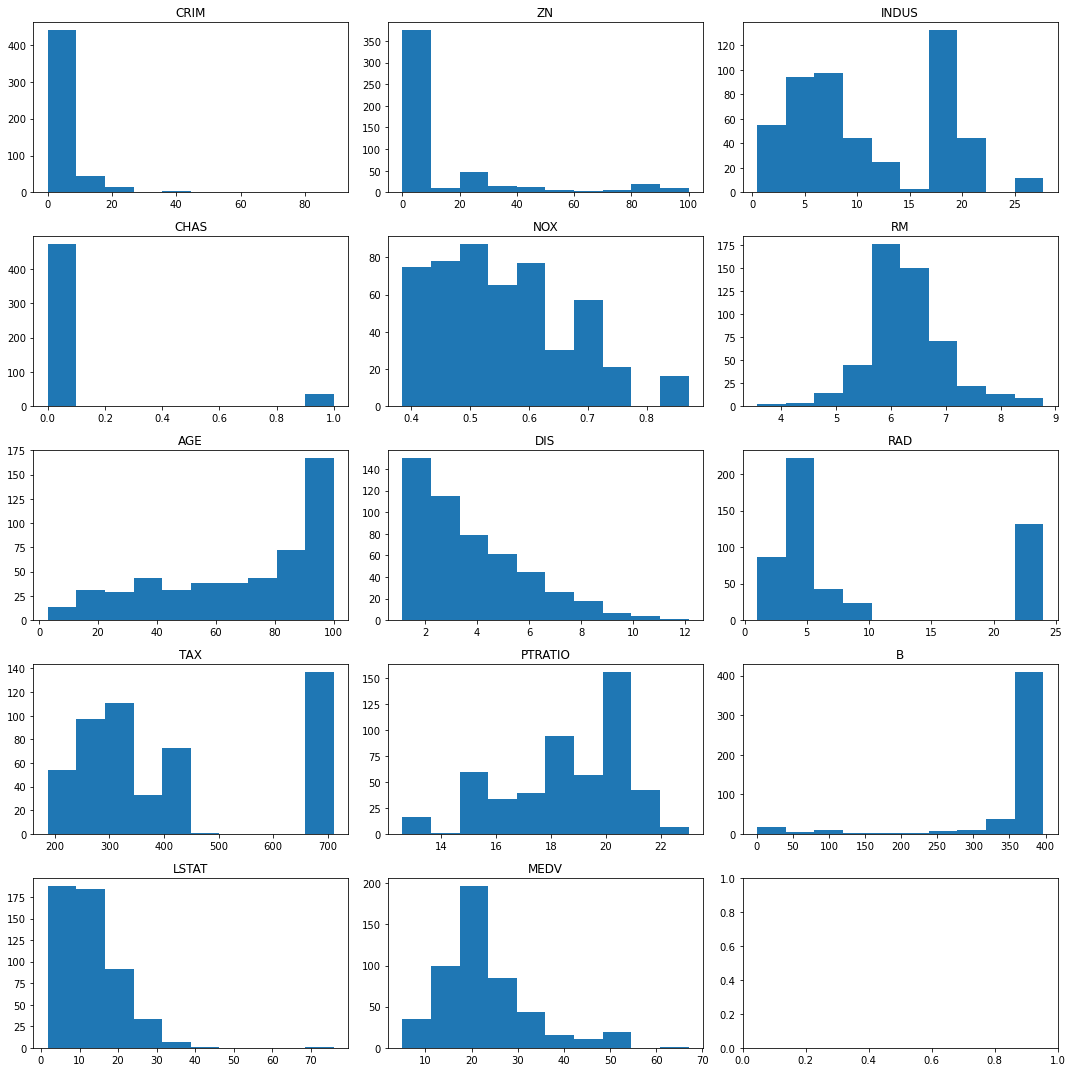

In [11]:
fig, axs = plt.subplots(5, 3, figsize=(15, 15))
axs = axs.ravel()

# Plot each histogram in the corresponding subplot
for i, feature in enumerate(data.columns):
    axs[i].hist(data[feature])
    axs[i].set_title(feature)
    
plt.tight_layout()
plt.show()

Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [12]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.02%
Column LSTAT outliers = 1.58%
Column MEDV outliers = 7.71%


Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions

In [13]:
data = data[~(data['MEDV'] >= 50.0)]
np.shape(data)

(488, 14)

Let's see how these features plus MEDV distributions looks like

C:\Users\adile\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adile\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adile\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

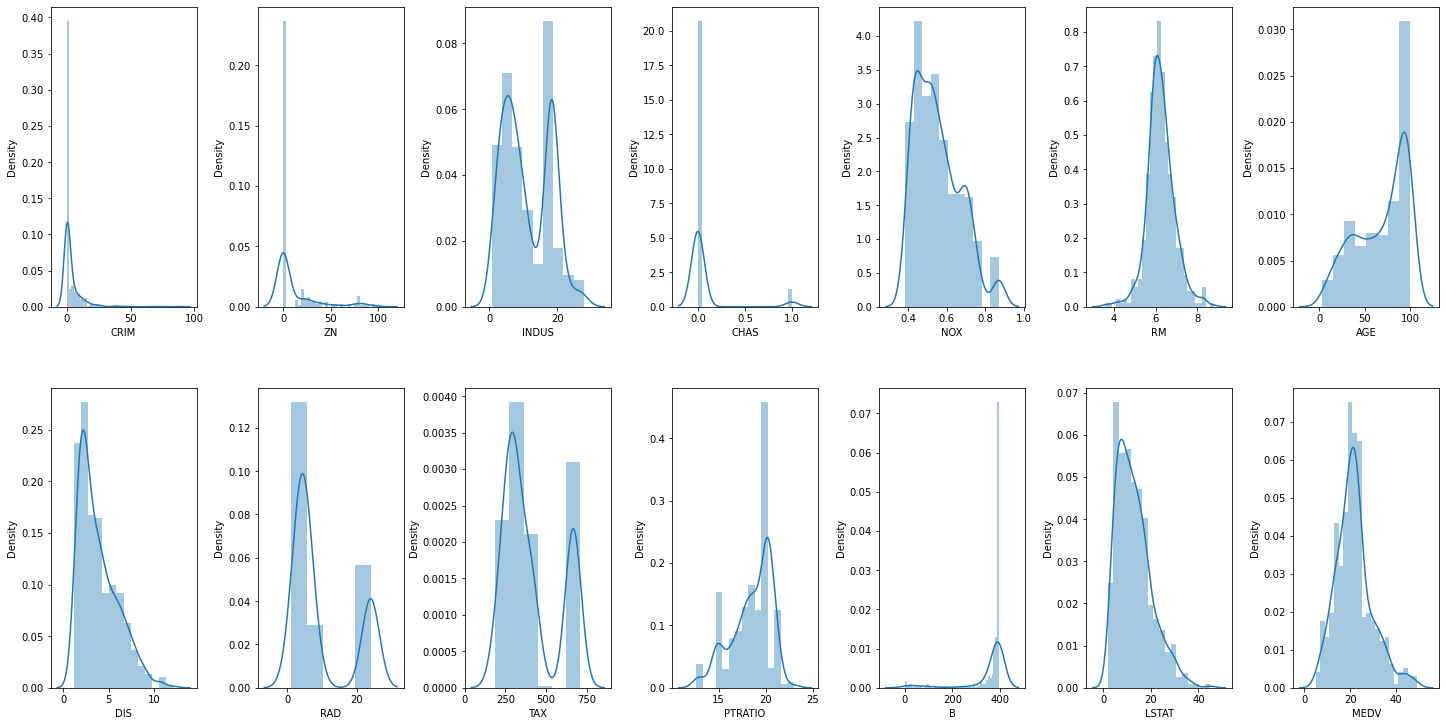

In [14]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

Is there a difference in median values of houses of each proportion of owner-occupied units built noticable time ago?

Discretizing the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [15]:
data_v = data.copy()
data_v.loc[(data['AGE']<=35),'age']='35 and younger'
data_v.loc[(data['AGE']>35)&(data['AGE']<70),'age']='between 35 and 70'
data_v.loc[data['AGE']>=70,'age']='70 and older'
data_v.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,age
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,between 35 and 70
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,70 and older
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,between 35 and 70
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,between 35 and 70
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,between 35 and 70


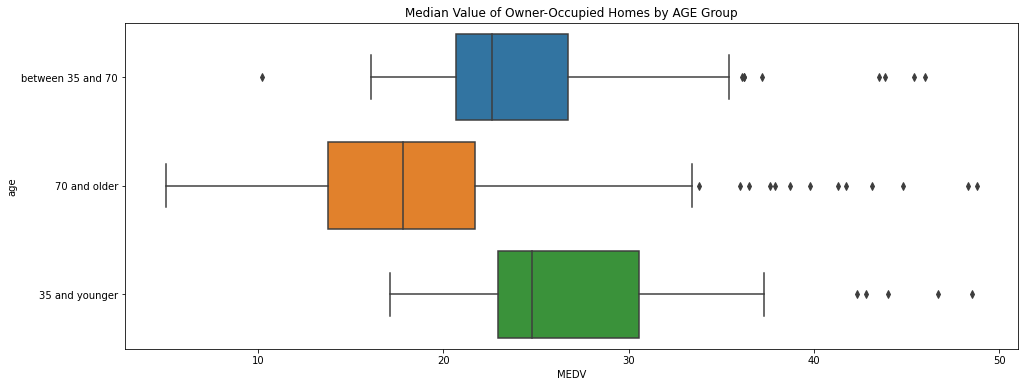

In [16]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(x='MEDV', y='age', data=data_v)
plt.title("Median Value of Owner-Occupied Homes by AGE Group")
plt.show()

We can observe that the MEDV values of the three samples are significantly different from each other. However, to rule out the possibility that these differences are due to chance.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

C:\Users\adile\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'The median value of houses bounded by the Charles river[1] or not[0]'}, xlabel='CHAS', ylabel='MEDV'>

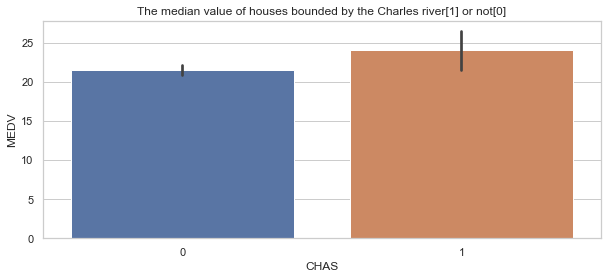

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,4))
plt.title("The median value of houses bounded by the Charles river[1] or not[0]")
sns.barplot(data['CHAS'], data['MEDV'],data=data)

While it is visually noticeable that the median value (MEDV) of houses bounded by the Charles River is higher than that of those not bounded, but this difference is not statistically significant.

Heatmap of the correlation matrix, to show relationship between features

<AxesSubplot:>

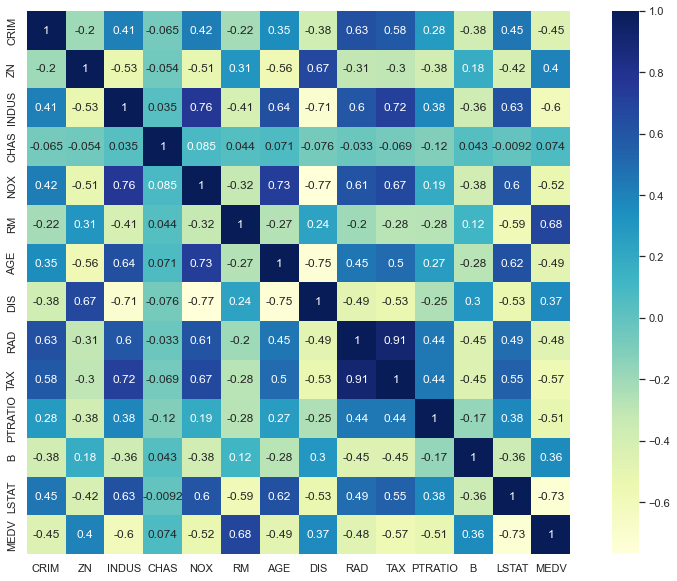

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cbar=True, square=True, annot=True, cmap='YlGnBu')

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

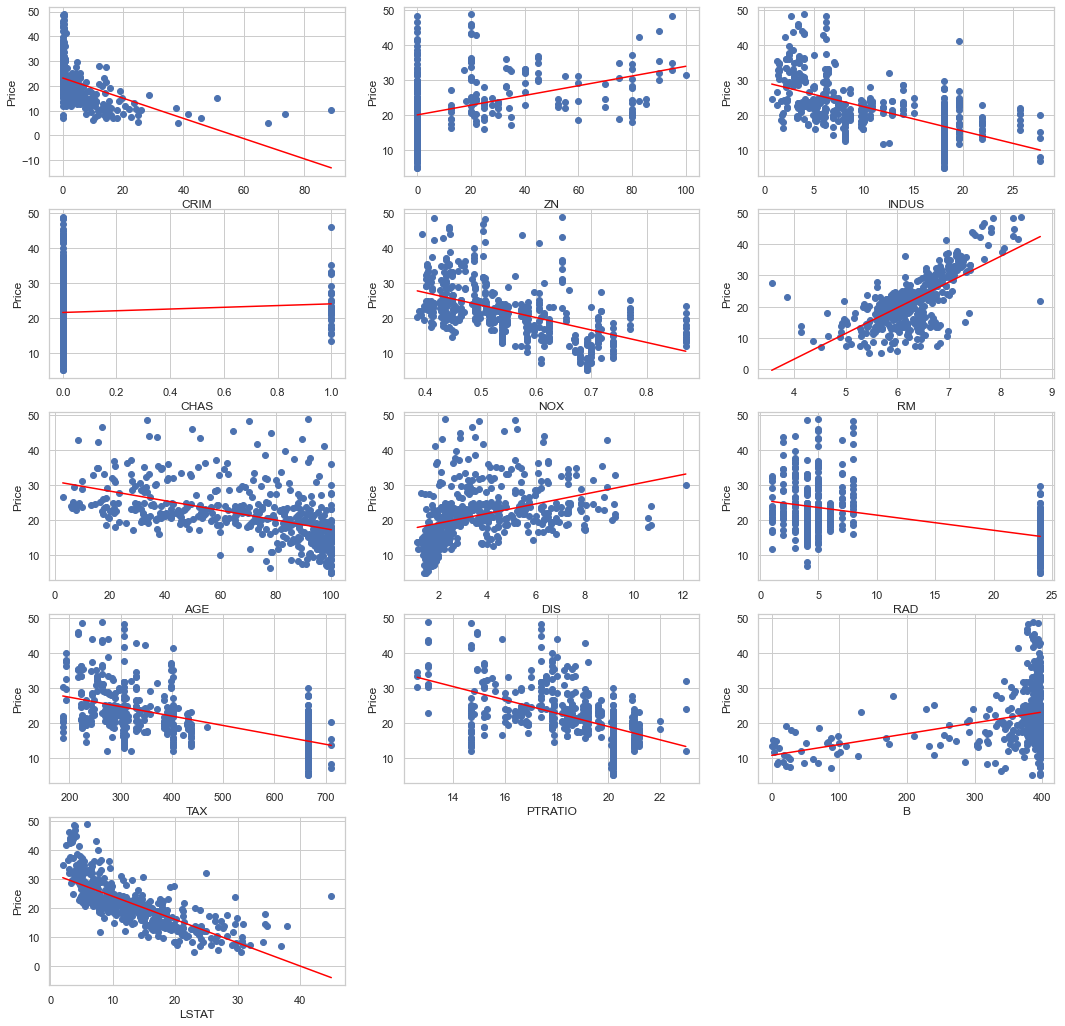

In [19]:
from scipy import stats
plt.figure(figsize=(18, 18))

for i, idx in enumerate(data.columns[0:13]):
    plt.subplot(5, 3, i+1)
    x = data[idx] 
    y = data['MEDV']
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(idx)
    plt.ylabel('Price')

So with these analsis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. Let's try to remove the skewness of the data trough log transformation.

In [20]:
min_max_scaler = MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
X = data.loc[:,column_sels]
y = data['MEDV']
X = pd.DataFrame(data=min_max_scaler.fit_transform(X), columns=column_sels)
y =  np.log1p(y)
for col in X.columns:
    if np.abs(X[col].skew()) > 0.3:
        X[col] = np.log1p(X[col])

# Models

Training models, predict, compare

In [21]:
models = [LinearRegression(), 
          DecisionTreeRegressor(), 
          RandomForestRegressor(), 
          SVR(), 
          KNeighborsRegressor(), 
          GradientBoostingRegressor()
         ]

model_names = ['Linear Regression', 
               'Decision Tree', 
               'Random Forest', 
               'Support Vector Regression', 
               'KNeighbors Regression', 
               'Gradient Boosting Regression'
              ]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression testing Accuracy:  0.7808407219838326
Linear Regression MAE: 0.12, MSE: 0.03, R2: 0.78


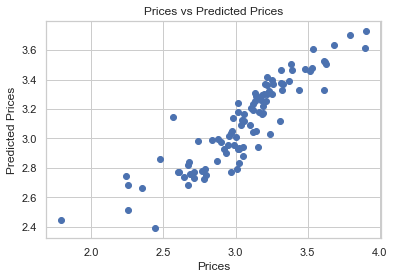

Decision Tree testing Accuracy:  0.7121586727682067
Decision Tree MAE: 0.14, MSE: 0.04, R2: 0.71


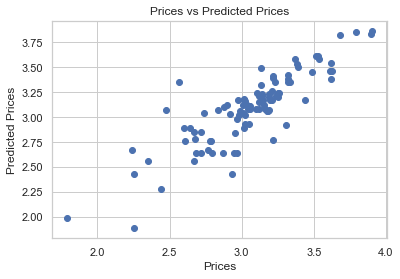

Random Forest testing Accuracy:  0.8213847291889611
Random Forest MAE: 0.10, MSE: 0.02, R2: 0.82


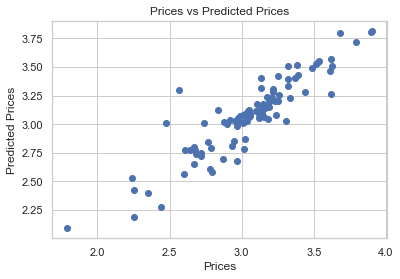

Support Vector Regression testing Accuracy:  0.8576283580463869
Support Vector Regression MAE: 0.09, MSE: 0.02, R2: 0.86


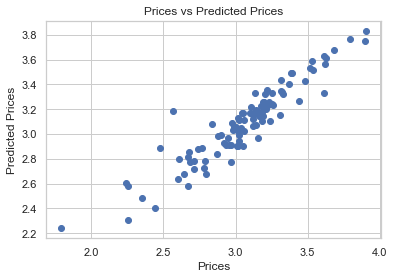

KNeighbors Regression testing Accuracy:  0.8296603702177175
KNeighbors Regression MAE: 0.10, MSE: 0.02, R2: 0.83


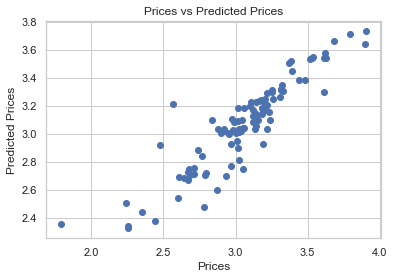

Gradient Boosting Regression testing Accuracy:  0.8158412620286748
Gradient Boosting Regression MAE: 0.11, MSE: 0.02, R2: 0.82


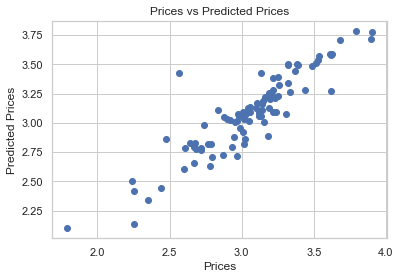

In [22]:
# Define a dictionary to store the model performances
performances = {}

# Train the models and evaluate their performances
for model, name in zip(models, model_names):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print the performance metrics
    print(f'{name} testing Accuracy: ',model.score(X_test, y_test))
    print(f"{name} MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.2f}")
    
    # Store the performance metrics in the dictionary
    performances[name] = [mae, mse, r2]
    
    # Visualizing the differences between actual prices and predicted values
    plt.scatter(y_test, y_pred)
    plt.xlabel("Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Prices vs Predicted Prices")
    
    plt.show()

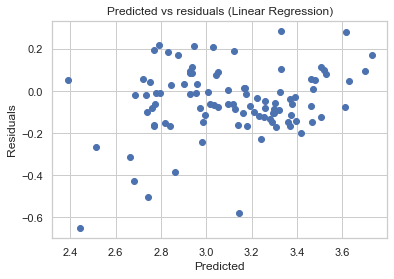

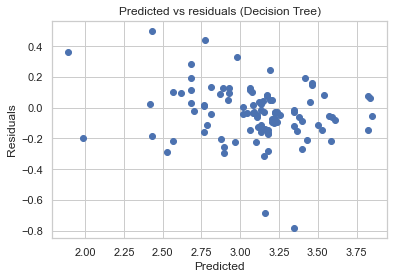

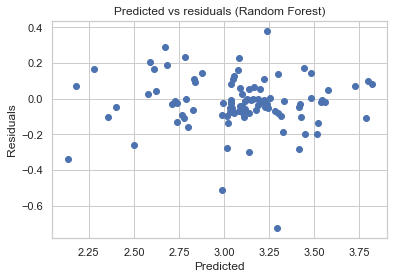

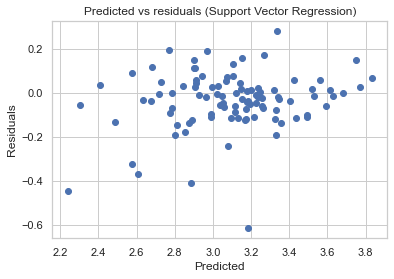

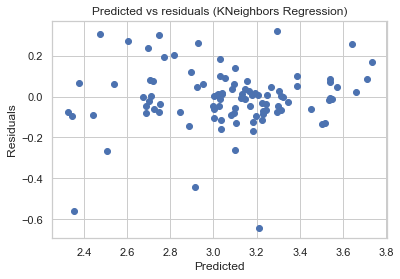

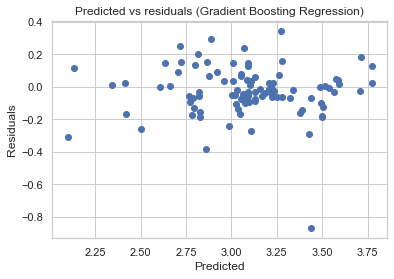

In [23]:
for model, name in zip(models, model_names):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Checking residuals
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.title(f"Predicted vs residuals ({name})")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.show()
    
    plt.show()

C:\Users\adile\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


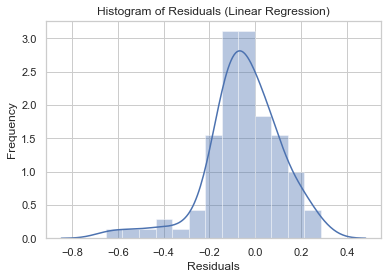

C:\Users\adile\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


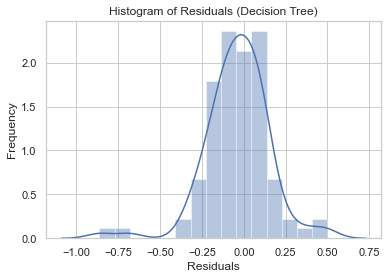

C:\Users\adile\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


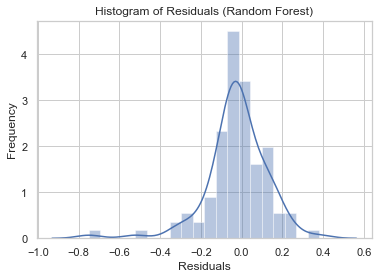

C:\Users\adile\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


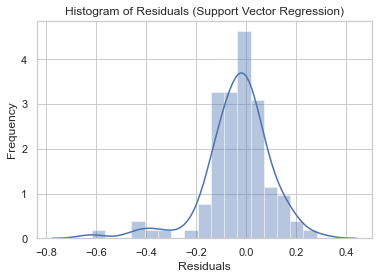

C:\Users\adile\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


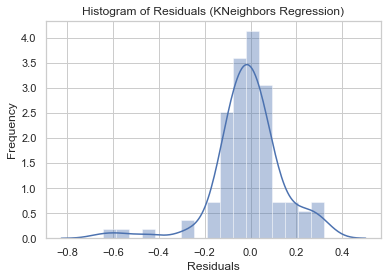

C:\Users\adile\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


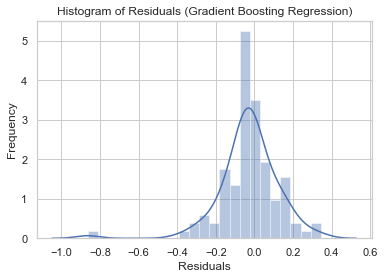

In [24]:
for model, name in zip(models, model_names):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Checking Normality of errors
    residuals = y_test - y_pred
    sns.distplot(residuals)
    plt.title(f"Histogram of Residuals ({name})")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()
    
    plt.show()

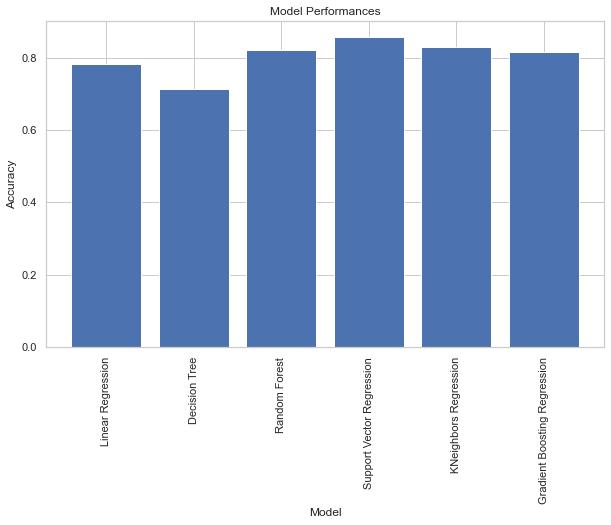

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(performances.keys(), [p[2] for p in performances.values()])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performances')
plt.xticks(rotation=90)
plt.show()

Chart displays that all models did more or less good, accuaracy lying around 80%, Gradient Boosting Regression being the best, with accuracy: 0.8169051567652379 MAE: 0.10, MSE: 0.02, R2: 0.82